In [11]:
# pip install scikit-learn pandas

from sklearn import datasets
iris_X, iris_y = datasets.load_iris(return_X_y=True)
iris_X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [12]:
iris_y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
from sklearn.model_selection import train_test_split

iris_X_train_df, iris_X_test_df, iris_y_train_df, iris_y_test_df = train_test_split(iris_X, iris_y, test_size=0.3)

In [14]:
import pandas as pd

iris_X_train_df = pd.DataFrame(iris_X_train_df, columns=datasets.load_iris().feature_names)
iris_X_test_df = pd.DataFrame(iris_X_test_df, columns=datasets.load_iris().feature_names)
iris_X_train_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.0,3.3,1.4,0.2
1,6.7,3.1,4.7,1.5
2,5.4,3.4,1.5,0.4
3,6.9,3.2,5.7,2.3
4,6.9,3.1,4.9,1.5


In [15]:
# Build an SVM classifier using the petal length and widths as features (without scaling)
from sklearn import svm

petal_columns = ['petal length (cm)', 'petal width (cm)']
sepal_columns = ['sepal length (cm)', 'sepal width (cm)']

def build_non_scaled_svm(train_X, train_y, column_names, kernel='rbf', C=1):
	train_X_df = train_X[column_names]

	svm_clf_no_scaling = svm.SVC(kernel=kernel, C=C)
	svm_clf_no_scaling.fit(train_X_df, train_y)

	return svm_clf_no_scaling

iris_petal_svm_clf_no_scaling = build_non_scaled_svm(iris_X_train_df, iris_y_train_df, petal_columns)

In [16]:
# Center and scale each feature by applying the StandardScaler function from the sklearn.preprocessing library 
# to create features with a mean of 0 and unit variance.
from sklearn.preprocessing import StandardScaler

def build_scaled_svm(train_X, train_y, column_names):
	train_X_df = train_X[column_names]

	scaler = StandardScaler()
	scaler.fit(train_X_df)
	iris_scaled = scaler.transform(train_X_df)

	svm_clf_scaling = svm.SVC()
	svm_clf_scaling.fit(iris_scaled, train_y)

	return scaler, svm_clf_scaling

iris_petal_scaler, iris_petal_svm_clf_scaling = build_scaled_svm(iris_X_train_df, iris_y_train_df, petal_columns)

In [17]:
# Compare the performance of a model (or more) on the original features and the transformed features.
from sklearn.metrics import accuracy_score

def compare_scaled_vs_non_scaled(svm_clf_no_scaling, svm_clf_scaling, scaler, test_X, test_y, column_names):
	test_X_df = test_X[column_names]

	no_scaling_pred = svm_clf_no_scaling.predict(test_X_df)

	test_scaled = scaler.transform(test_X_df)
	scaling_pred = svm_clf_scaling.predict(test_scaled)

	no_scaling_accuracy = accuracy_score(test_y, no_scaling_pred)
	scaling_accuracy = accuracy_score(test_y, scaling_pred)

	print(f'No scaling accuracy: {no_scaling_accuracy}')
	print(f'Scaling accuracy: {scaling_accuracy}')
	return no_scaling_accuracy, scaling_accuracy

compare_scaled_vs_non_scaled(iris_petal_svm_clf_no_scaling, iris_petal_svm_clf_scaling, iris_petal_scaler, iris_X_test_df, iris_y_test_df, petal_columns)

No scaling accuracy: 0.9777777777777777
Scaling accuracy: 0.9777777777777777


(0.9777777777777777, 0.9777777777777777)

In [19]:

iris_petal_scaled = iris_petal_scaler.transform(iris_X_train_df[petal_columns])
iris_petal_test_scaled = iris_petal_scaler.transform(iris_X_test_df[petal_columns])

def print_accuracy_score_for_svm(kernel, C):
	clf = svm.SVC(kernel=kernel, C=C)
	clf.fit(iris_petal_scaled, iris_y_train_df)
	pred = clf.predict(iris_petal_test_scaled)
	accuracy = accuracy_score(iris_y_test_df, pred)
	print(f'Kernel: {kernel}, C: {C}, Accuracy Score: {accuracy}')
	return clf

# possible kernels: linear, poly, rbf, sigmoid
clf_rbf_1 = print_accuracy_score_for_svm('rbf', 1)
clf_linear_1 = print_accuracy_score_for_svm('linear', 1)
clf_poly_1 = print_accuracy_score_for_svm('poly', 1)
clf_sigmoid_1 = print_accuracy_score_for_svm('sigmoid', 1)
print()

clf_rbf_2 = print_accuracy_score_for_svm('rbf', 2)
clf_linear_2 = print_accuracy_score_for_svm('linear', 2)
clf_poly_2 = print_accuracy_score_for_svm('poly', 2)
clf_sigmoid_2 = print_accuracy_score_for_svm('sigmoid', 2)
print()

clf_rbf_5 = print_accuracy_score_for_svm('rbf', 5)
clf_linear_5 = print_accuracy_score_for_svm('linear', 5)
clf_poly_5 = print_accuracy_score_for_svm('poly', 5)
clf_sigmoid_5 = print_accuracy_score_for_svm('sigmoid', 5)
print()

clf_rbf_10 = print_accuracy_score_for_svm('rbf', 10)
clf_linear_10 = print_accuracy_score_for_svm('linear', 10)
clf_poly_10 = print_accuracy_score_for_svm('poly', 10)
clf_sigmoid_10 = print_accuracy_score_for_svm('sigmoid', 10)
print()

clf_rbf_50 = print_accuracy_score_for_svm('rbf', 50)
clf_linear_50 = print_accuracy_score_for_svm('linear', 50)
clf_poly_50 = print_accuracy_score_for_svm('poly', 50)
clf_sigmoid_50 = print_accuracy_score_for_svm('sigmoid', 50)
print()

Kernel: rbf, C: 1, Accuracy Score: 0.9777777777777777
Kernel: linear, C: 1, Accuracy Score: 0.9777777777777777
Kernel: poly, C: 1, Accuracy Score: 0.9555555555555556
Kernel: sigmoid, C: 1, Accuracy Score: 0.9555555555555556

Kernel: rbf, C: 2, Accuracy Score: 0.9777777777777777
Kernel: linear, C: 2, Accuracy Score: 0.9777777777777777
Kernel: poly, C: 2, Accuracy Score: 0.9777777777777777
Kernel: sigmoid, C: 2, Accuracy Score: 0.9777777777777777

Kernel: rbf, C: 5, Accuracy Score: 0.9777777777777777
Kernel: linear, C: 5, Accuracy Score: 0.9777777777777777
Kernel: poly, C: 5, Accuracy Score: 0.9777777777777777
Kernel: sigmoid, C: 5, Accuracy Score: 0.9333333333333333

Kernel: rbf, C: 10, Accuracy Score: 0.9777777777777777
Kernel: linear, C: 10, Accuracy Score: 0.9777777777777777
Kernel: poly, C: 10, Accuracy Score: 0.9777777777777777
Kernel: sigmoid, C: 10, Accuracy Score: 0.9111111111111111

Kernel: rbf, C: 50, Accuracy Score: 0.9777777777777777
Kernel: linear, C: 50, Accuracy Score: 0.

In [20]:
# Using scaled features, experiment with different kernel functions and/or regularization parameters to find the ones that work best for this problem.
# Train and evaluate the SVM models, using appropriate performance metrics like accuracy, precision, recall, and F1-score.
from sklearn.metrics import f1_score, precision_score, recall_score

def evaluate_kernels_and_regularization_params(train_X, train_y, test_X, test_y, column_names):
	# possible kernels: linear, poly, rbf, sigmoid
	clf_rbf_1 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'rbf', 1)
	clf_rbf_2 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'rbf', 2)
	clf_rbf_5 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'rbf', 5)
	clf_rbf_10 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'rbf', 10)
	clf_rbf_50 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'rbf', 50)
	print()

	clf_linear_1 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'linear', 1)
	clf_linear_2 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'linear', 2)
	clf_linear_5 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'linear', 5)
	clf_linear_10 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'linear', 10)
	clf_linear_50 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'linear', 50)
	print()
	
	clf_poly_1 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'poly', 1)
	clf_poly_2 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'poly', 2)
	clf_poly_5 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'poly', 5)
	clf_poly_10 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'poly', 10)
	clf_poly_50 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'poly', 50)
	print()
	
	clf_sigmoid_1 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'sigmoid', 1)
	clf_sigmoid_2 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'sigmoid', 2)
	clf_sigmoid_5 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'sigmoid', 5)
	clf_sigmoid_10 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'sigmoid', 10)
	clf_sigmoid_50 = print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, 'sigmoid', 50)
	print()

def print_accuracy_precision_recall_and_f1_score_for_svm(train_X, train_y, test_X, test_y, column_names, kernel, C):
	train_X_df = train_X[column_names]

	scaler = StandardScaler()
	scaler.fit(train_X_df)
	iris_scaled = scaler.transform(train_X_df)

	svm_clf_scaling = svm.SVC(kernel=kernel, C=C)
	svm_clf_scaling.fit(iris_scaled, train_y)

	test_X_df = test_X[column_names]

	iris_test_scaled = scaler.transform(test_X_df)
	pred = svm_clf_scaling.predict(iris_test_scaled)
	accuracy = accuracy_score(test_y, pred)
	precision = precision_score(test_y, pred, average='weighted')
	recall = recall_score(test_y, pred, average='weighted')
	f1 = f1_score(test_y, pred, average='weighted')
	print(f'Kernel: {kernel}\t\tC: {C}\t\tAccuracy Score: {accuracy:.2f},\t\tPrecision: {precision:.2f},\tRecall: {recall:.2f},\t\tF1 Score: {f1:.2f}')
	return svm_clf_scaling

evaluate_kernels_and_regularization_params(iris_X_train_df, iris_y_train_df, iris_X_test_df, iris_y_test_df, petal_columns)


Kernel: rbf		C: 1		Accuracy Score: 0.98,		Precision: 0.98,	Recall: 0.98,		F1 Score: 0.98
Kernel: rbf		C: 2		Accuracy Score: 0.98,		Precision: 0.98,	Recall: 0.98,		F1 Score: 0.98
Kernel: rbf		C: 5		Accuracy Score: 0.98,		Precision: 0.98,	Recall: 0.98,		F1 Score: 0.98
Kernel: rbf		C: 10		Accuracy Score: 0.98,		Precision: 0.98,	Recall: 0.98,		F1 Score: 0.98
Kernel: rbf		C: 50		Accuracy Score: 0.98,		Precision: 0.98,	Recall: 0.98,		F1 Score: 0.98

Kernel: linear		C: 1		Accuracy Score: 0.98,		Precision: 0.98,	Recall: 0.98,		F1 Score: 0.98
Kernel: linear		C: 2		Accuracy Score: 0.98,		Precision: 0.98,	Recall: 0.98,		F1 Score: 0.98
Kernel: linear		C: 5		Accuracy Score: 0.98,		Precision: 0.98,	Recall: 0.98,		F1 Score: 0.98
Kernel: linear		C: 10		Accuracy Score: 0.98,		Precision: 0.98,	Recall: 0.98,		F1 Score: 0.98
Kernel: linear		C: 50		Accuracy Score: 0.98,		Precision: 0.98,	Recall: 0.98,		F1 Score: 0.98

Kernel: poly		C: 1		Accuracy Score: 0.96,		Precision: 0.96,	Recall: 0.96,		F1 Score: 0.96

In [21]:
# Repeat to create SVM models for the sepal information (use the 1st and 2nd columns of the scaled data – this is the sepal length and width).

# Build an SVM classifier using the sepal length and widths as features (without scaling)
iris_sepal_svm_clf_no_scaling = build_non_scaled_svm(iris_X_train_df, iris_y_train_df, sepal_columns)

# Center and scale each feature by applying the StandardScaler function from the sklearn.preprocessing library 
# to create features with a mean of 0 and unit variance.
iris_sepal_scaler, iris_sepal_svm_clf_scaling = build_scaled_svm(iris_X_train_df, iris_y_train_df, sepal_columns)

# Compare the performance of a model (or more) on the original features and the transformed features.
compare_scaled_vs_non_scaled(iris_sepal_svm_clf_no_scaling, iris_sepal_svm_clf_scaling, iris_sepal_scaler, iris_X_test_df, iris_y_test_df, sepal_columns)

# Using scaled features, experiment with different kernel functions and/or regularization parameters to find the ones that work best for this problem.
# Train and evaluate the SVM models, using appropriate performance metrics like accuracy, precision, recall, and F1-score.
evaluate_kernels_and_regularization_params(iris_X_train_df, iris_y_train_df, iris_X_test_df, iris_y_test_df, sepal_columns)


No scaling accuracy: 0.7555555555555555


Scaling accuracy: 0.7555555555555555
Kernel: rbf		C: 1		Accuracy Score: 0.76,		Precision: 0.76,	Recall: 0.76,		F1 Score: 0.75
Kernel: rbf		C: 2		Accuracy Score: 0.76,		Precision: 0.77,	Recall: 0.76,		F1 Score: 0.75
Kernel: rbf		C: 5		Accuracy Score: 0.73,		Precision: 0.73,	Recall: 0.73,		F1 Score: 0.73
Kernel: rbf		C: 10		Accuracy Score: 0.76,		Precision: 0.76,	Recall: 0.76,		F1 Score: 0.75
Kernel: rbf		C: 50		Accuracy Score: 0.76,		Precision: 0.76,	Recall: 0.76,		F1 Score: 0.75

Kernel: linear		C: 1		Accuracy Score: 0.76,		Precision: 0.76,	Recall: 0.76,		F1 Score: 0.75
Kernel: linear		C: 2		Accuracy Score: 0.76,		Precision: 0.76,	Recall: 0.76,		F1 Score: 0.75
Kernel: linear		C: 5		Accuracy Score: 0.76,		Precision: 0.76,	Recall: 0.76,		F1 Score: 0.75
Kernel: linear		C: 10		Accuracy Score: 0.76,		Precision: 0.76,	Recall: 0.76,		F1 Score: 0.75
Kernel: linear		C: 50		Accuracy Score: 0.76,		Precision: 0.76,	Recall: 0.76,		F1 Score: 0.75

Kernel: poly		C: 1		Accuracy Score: 0.73,		Precisio

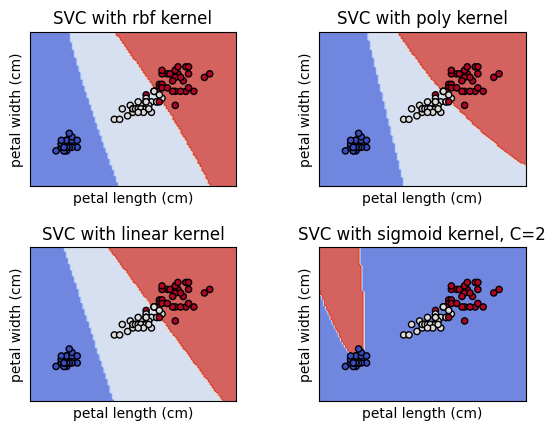

In [22]:
# Visualize separating planes learned by different SVM models for the petal features. In this case you should not scale your data as we want to plot the support vectors. This means that you should refit the SVM model using unscaled features.

import matplotlib.pyplot as plt
from sklearn import datasets, svm
from sklearn.inspection import DecisionBoundaryDisplay

petal_rbf_1 = build_non_scaled_svm(iris_X_train_df, iris_y_train_df, petal_columns, 'rbf', 1)
petal_poly_1 = build_non_scaled_svm(iris_X_train_df, iris_y_train_df, petal_columns, 'poly', 1)
petal_linear_1 = build_non_scaled_svm(iris_X_train_df, iris_y_train_df, petal_columns, 'linear', 1)
petal_sigmoid_2 = build_non_scaled_svm(iris_X_train_df, iris_y_train_df, petal_columns, 'sigmoid', 2)

models = (petal_rbf_1, petal_poly_1, petal_linear_1, petal_sigmoid_2)

iris_X_petal_train_df = iris_X_train_df[petal_columns]

# title for the plots
titles = (
    "SVC with rbf kernel",
    "SVC with poly kernel",
    "SVC with linear kernel",
    "SVC with sigmoid kernel, C=2",
)

# Set-up 2x2 grid for plotting.
fig, sub = plt.subplots(2, 2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)
X0 = iris_X_petal_train_df["petal length (cm)"] # chose the features (from X) you want to plot
X1 = iris_X_petal_train_df["petal width (cm)"] # chose the features (from X) you want to plot
y = iris_y_train_df

for clf, title, ax in zip(models, titles, sub.flatten()):
    disp = DecisionBoundaryDisplay.from_estimator(
        clf,
        iris_X_petal_train_df, # X should be a matrix of size number of samples by 2
        response_method="predict",
        cmap=plt.cm.coolwarm,
        alpha=0.8,
        ax=ax,
        xlabel= "petal length (cm)", # corresponding feature names here
        ylabel= "petal width (cm)", # corresponding feature names here 
    )
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
plt.show()

In [254]:
# Train another classification algorithm on the original and transformed features. Evaluate the two models using different evaluation metrics. Bonus: visualize the decision boundary of the model you chose.
from sklearn.tree import DecisionTreeClassifier as decision_tree

def build_non_scaled_decision_tree(train_X, train_y, column_names, kernel='rbf', C=1):
	train_X_df = train_X[column_names]

	decision_tree_clf_no_scaling = decision_tree()
	decision_tree_clf_no_scaling.fit(train_X_df, train_y)

	return decision_tree_clf_no_scaling

def build_scaled_decision_tree(train_X, train_y, column_names, min_samples_split):
	train_X_df = train_X[column_names]

	scaler = StandardScaler()
	scaler.fit(train_X_df)
	iris_scaled = scaler.transform(train_X_df)

	decision_tree_clf_scaling = decision_tree(min_samples_split=min_samples_split)
	decision_tree_clf_scaling.fit(iris_scaled, train_y)

	return scaler, decision_tree_clf_scaling

def compare_scaled_vs_non_scaled(decision_tree_clf_no_scaling, decision_tree_clf_scaling, scaler, test_X, test_y, column_names, min_samples_split):
	test_X_df = test_X[column_names]

	no_scaling_pred = decision_tree_clf_no_scaling.predict(test_X_df)

	test_scaled = scaler.transform(test_X_df)
	scaling_pred = decision_tree_clf_scaling.predict(test_scaled)

	no_scaling_accuracy = accuracy_score(test_y, no_scaling_pred)
	no_scaling_precision = precision_score(test_y, no_scaling_pred, average='weighted')
	no_scaling_recall = recall_score(test_y, no_scaling_pred, average='weighted')
	no_scaling_f1 = f1_score(test_y, no_scaling_pred, average='weighted')

	scaling_accuracy = accuracy_score(test_y, scaling_pred)
	scaling_precision = precision_score(test_y, scaling_pred, average='weighted')
	scaling_recall = recall_score(test_y, scaling_pred, average='weighted')
	scaling_f1 = f1_score(test_y, scaling_pred, average='weighted')

	print(f'{min_samples_split:2.0f} Decision Tree No Scaling Scores:\tAccuracy Score:\t{no_scaling_accuracy:.2f},\t\tPrecision: {no_scaling_precision:.2f},\tRecall: {no_scaling_recall:.2f},\t\tF1 Score: {no_scaling_f1:.2f}')
	print(f'{min_samples_split:2.0f} Decision Tree Scaling Scores:\tAccuracy Score:\t{scaling_accuracy:.2f},\t\tPrecision: {scaling_precision:.2f},\tRecall: {scaling_recall:.2f},\t\tF1 Score: {scaling_f1:.2f}')

# Build a classifier using the sepal length and widths as features (without scaling)
iris_sepal_decision_tree_clf_no_scaling = build_non_scaled_decision_tree(iris_X_train_df, iris_y_train_df, sepal_columns)

# Center and scale each feature by applying the StandardScaler function from the sklearn.preprocessing library 
# to create features with a mean of 0 and unit variance.

def test_hyperparameters_for_decision_tree(min_samples_split):
	iris_sepal_scaler, iris_sepal_decision_tree_clf_scaling = build_scaled_decision_tree(iris_X_train_df, iris_y_train_df, sepal_columns, min_samples_split)

	# Compare the performance of a model (or more) on the original features and the transformed features.
	compare_scaled_vs_non_scaled(iris_sepal_decision_tree_clf_no_scaling, iris_sepal_decision_tree_clf_scaling, iris_sepal_scaler, iris_X_test_df, iris_y_test_df, sepal_columns, min_samples_split)
	print()

test_hyperparameters_for_decision_tree(2)
test_hyperparameters_for_decision_tree(5)
test_hyperparameters_for_decision_tree(10)
test_hyperparameters_for_decision_tree(15)
test_hyperparameters_for_decision_tree(20)
test_hyperparameters_for_decision_tree(25)
test_hyperparameters_for_decision_tree(30)
test_hyperparameters_for_decision_tree(50)
test_hyperparameters_for_decision_tree(100)

 2 Decision Tree No Scaling Scores:	Accuracy Score:	0.69,		Precision: 0.69,	Recall: 0.69,		F1 Score: 0.69
 2 Decision Tree Scaling Scores:	Accuracy Score:	0.69,		Precision: 0.69,	Recall: 0.69,		F1 Score: 0.69

 5 Decision Tree No Scaling Scores:	Accuracy Score:	0.69,		Precision: 0.69,	Recall: 0.69,		F1 Score: 0.69
 5 Decision Tree Scaling Scores:	Accuracy Score:	0.73,		Precision: 0.74,	Recall: 0.73,		F1 Score: 0.73

10 Decision Tree No Scaling Scores:	Accuracy Score:	0.69,		Precision: 0.69,	Recall: 0.69,		F1 Score: 0.69
10 Decision Tree Scaling Scores:	Accuracy Score:	0.73,		Precision: 0.75,	Recall: 0.73,		F1 Score: 0.73

15 Decision Tree No Scaling Scores:	Accuracy Score:	0.69,		Precision: 0.69,	Recall: 0.69,		F1 Score: 0.69
15 Decision Tree Scaling Scores:	Accuracy Score:	0.73,		Precision: 0.75,	Recall: 0.73,		F1 Score: 0.73

20 Decision Tree No Scaling Scores:	Accuracy Score:	0.69,		Precision: 0.69,	Recall: 0.69,		F1 Score: 0.69
20 Decision Tree Scaling Scores:	Accuracy Score:	0.76,

c:\Users\jacobp\Git Repos\MSOE\applied-machine-learning\venv\lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
